# Report - Analytics para Big Data
## Bachelor in Information Systems / PUCPR

Professor Jean Paul Barddal

`Lucas Kusman Leal` - `lucas.kusman@pucpr.edu.br`

`Tiago Felipe Muller` - `tiago.muller@pucpr.edu.br`

`Vitor Felix Araujo` - `vitorfelix37@gmail.com`

`2022`

# Import the libs you need

In [68]:
# Import all packages you need here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [69]:
# load your data here
!wget https://raw.githubusercontent.com/LucasKleaL/AnalyticsBigData/main/NASA-NEOS-Dataset.csv
df = pd.read_csv('NASA-NEOS-Dataset.csv')

--2022-11-16 23:50:54--  https://raw.githubusercontent.com/LucasKleaL/AnalyticsBigData/main/NASA-NEOS-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5436867 (5.2M) [text/plain]
Saving to: ‘NASA-NEOS-Dataset.csv.1’

NASA-NEOS-Dataset.c 100%[===================>]   5.18M  --.-KB/s    in 0.02s   

2022-11-16 23:50:55 (273 MB/s) - ‘NASA-NEOS-Dataset.csv.1’ saved [5436867/5436867]



In [70]:
# Clean and treat the data here
# Observation dates parsing to datetime
df['first_date'] = pd.to_datetime(df['first_observation_date'], errors = 'coerce')
df['last_date'] = pd.to_datetime(df['last_observation_date'], errors = 'coerce')

In [71]:
# Clean data frame for machine learning classification
# Dropping collums with string values
cleanDf = df.drop(['designation', 'name', 'name_limited', 
                'orbit_class_description', 'neo_reference_id', 'orbit_id',
                'first_observation_date', 'last_observation_date',
                'first_date', 'last_date'], axis=1)
# Dropping rows with NaN values
cleanDf = cleanDf.dropna(axis=0, inplace=False)

# **Overview**
## **Context**
This dataset is about Near Earth Objects (NEOS) cataloged by NASA, providing data about the main asteroids and comets orbiting the Sun with a trajectory likely or near our planet. In this dataset we found the most important information about a celestial body, for example his orbit type, diameter size and luminosity.
* Number of features: 17
* Number of instances: 24000
* Feature types: Number(float), String, Object, Date


### **Features description**
*   **id** and **neo_reference_id**: A unique identification number given by NASA to all NEO.
*   **name**: Official name given by NASA (scientific name).
*   **name_limited**: Normal name without scientific notations (popular name). 99% of fault values (null).
*   **designation**: The number used in the official name given by NASA.
*   **absolute_magnitude_h**: Numerical value of the absolute magnitude of the NEO, which is a measuare of the luminosity of a celestial object.
*   **is_potentially_hazardous_asteroid**: Boolean value which tells if the object poses a threat to Earth.
*   **is_sentry_object**: Boolean value which tells if the object is present in the NASA Sentry Tracking System.
*   **kilometers_estimated_diameter_min**: Numerical value in kilometers of the minimum estimated diameter of the object.
*   **kilometers_estimated_diameter_max**: Numerical value in kilometers of the maximum estimated diameter of the object.
*   **orbit_id**: A unique numerical identification of the orbit class of the object.
*   **orbit_class_type**: Group classification of the object orbit.
*   **perihelion_distance**: Numerical value of the perihelion distance in Astronomical Units of the object, which is the point nearest to the Sun in the path of an orbiting celestial body.
*   **aphelion_distance**: Numerical value of the aphelion distance in Astronomical Units of the object, which is the point furthest to the Sun in the path of an orbiting celestial body.
*   **first_observation_date**: Date when the object was first observed.
*   **last_observation_date**: Date when the object was last observed.
*   **orbit_class_description**: Orbit class type description of the object.

### **Faltant values**
*   **name_limited:** 23.856 instances
*   **absolute_magnitude_h:** 8 instances
*   **kilometers_estimated_diameter_min:** 8 instances
*   **kilometers_estimated_diameter_max:** 8 instances

In [72]:
df['name_limited'].count()

144

In [73]:
df['absolute_magnitude_h'].count()

23992

In [74]:
df['kilometers_estimated_diameter_min'].count()

23992

In [75]:
df['kilometers_estimated_diameter_max'].count()

23992

# **Univariate data analysis**

## **NEOS magnitude analysis**
The luminosity of a celestial body is determined mainly by his size and distance from the Sun. It is expected for NEOS a mean distribution because the most part of the objects are small asteroids.
*   **Distribution**: Binomial
*   **Skew**: Symmetrical distribution
*   **Mean**: 22.94
*   **Standart deviation**: 2.95

In [76]:
df['absolute_magnitude_h'].describe()

count    23992.000000
mean        22.942274
std          2.952871
min         12.580000
25%         20.650000
50%         23.200000
75%         25.200000
max         33.200000
Name: absolute_magnitude_h, dtype: float64

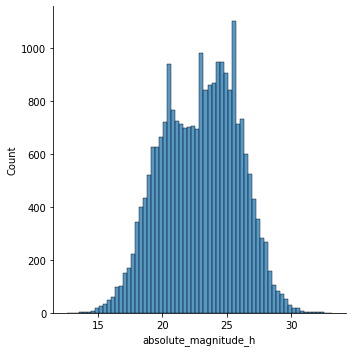

In [77]:
sns.displot(df['absolute_magnitude_h'])
plt.show()

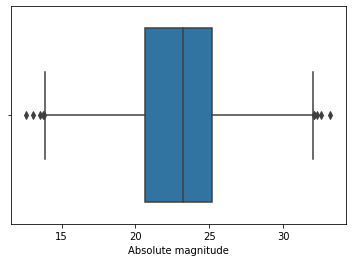

In [78]:
sns.boxplot(x=df['absolute_magnitude_h'])
plt.xlabel('Absolute magnitude')
plt.show()

## **Potentially hazardous NEOS analysis**
The most part of mapped near Earth objects has no previsions to collide with our planet, but a considerable part has a close approach in the next few years.

In [79]:
df['is_potentially_hazardous_asteroid'].describe()

count     24000
unique        2
top       False
freq      21906
Name: is_potentially_hazardous_asteroid, dtype: object

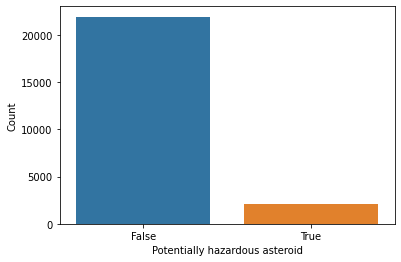

In [80]:
sns.countplot(x=df['is_potentially_hazardous_asteroid'])
plt.xlabel('Potentially hazardous asteroid')
plt.ylabel('Count')
plt.show()

## **NEOS monitored by NASA Sentry System**
Sentry is a highly automated collision monitoring system that continually scans the most current asteroid catalog for possibilities of future impact with Earth over the next 100 years. This system is developed and maintained by NASA JPL. Not all the potentially hazardous objects is monitored by Sentry

In [81]:
df['is_sentry_object'].describe()

count     24000
unique        2
top       False
freq      22934
Name: is_sentry_object, dtype: object

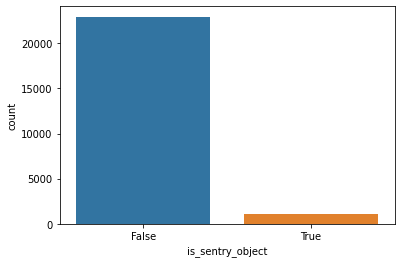

In [82]:
sns.countplot(x=df['is_sentry_object'])
plt.show()

## **NEOS Orbit Class Types**
All NEOS are classified into groups according to their distance from Earth's orbit from astronomical units. Below is the definition of each group:
### **APO**
Near-Earth asteroid orbits which cross the Earth's orbit similar to that of 1862 Apollo (a > 1.0 AU; q < 1.017 AU).
### **AMO**
Near-Earth asteroid orbits similar to that of 1221 Amor (a > 1.0 AU; 1.017 AU < q < 1.3 AU).
### **ATE**
Near-Earth asteroid orbits similar to that of 2062 Aten (a < 1.0 AU; Q > 0.983 AU).
### **IEO**
An asteroid orbit contained entirely within the orbit of the Earth (Q < 0.983 AU).

In [83]:
df['orbit_class_type'].describe()

count     24000
unique        4
top         APO
freq      13245
Name: orbit_class_type, dtype: object

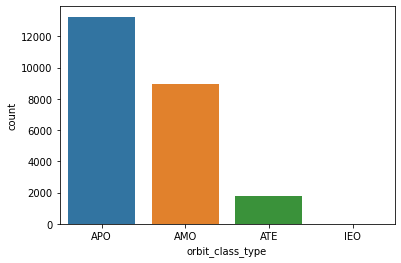

In [84]:
sns.countplot(x=df['orbit_class_type'])
plt.show()

## **NEOS observation dates analysis**
It is expected that with the passing of years and consequently the technological increase, new objects will be discovered due to the operation of advanced observation instruments. But currently most of the NEOS have already been mapped, reaching a stable level of new discoveries.

### **Object first observation date**
*   **Distribution**: Binomial
*   **Skew**: Negative Skew
*   **Mean**: 2012-05-03

In [85]:
df['first_date'].describe(datetime_is_numeric=True)

count                            23999
mean     2012-05-03 00:43:30.108754688
min                1931-12-03 00:00:00
25%                2008-09-01 12:00:00
50%                2014-08-25 00:00:00
75%                2018-01-15 00:00:00
max                2020-12-15 00:00:00
Name: first_date, dtype: object

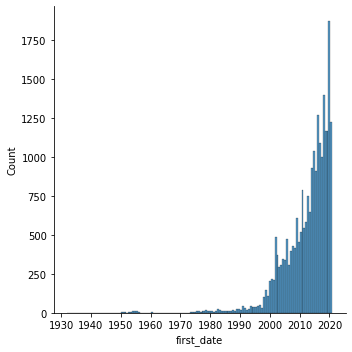

In [86]:
sns.displot(x=df['first_date'])
plt.show()

### **Object last obeservation date**
*   **Distribution**: Binomial
*   **Skew**: Negative Skew
*   **Mean**: 2016-09-06

In [87]:
df['last_date'].describe(datetime_is_numeric=True)

count                  24000
mean     2016-09-06 10:45:18
min      1979-12-15 00:00:00
25%      2014-07-31 00:00:00
50%      2018-01-27 12:00:00
75%      2020-02-27 00:00:00
max      2022-04-18 00:00:00
Name: last_date, dtype: object

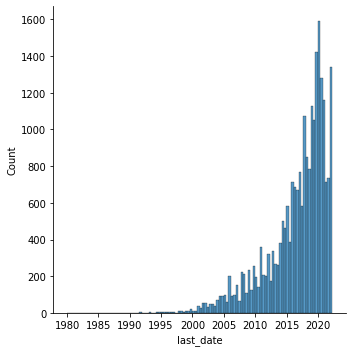

In [88]:
sns.displot(x=df['last_date'])
plt.show()

## **NEOS diameter size analysis**
It is expected that the vast majority of NEOS are small asteroids of a few meters, but there is a considerable amount of medium objects ranging from a hundred meters to 2 kilometers and a few large ones with an estimated maximum size between 2 and 17.5 kilometers.

### **Minimum diameter size in kilometers**
*   **Distribution**: Lognormal
*   **Skew**: Positive distribution
*   **Mean**: 0.16
*   **Standart deviation**: 0.29

In [89]:
df['kilometers_estimated_diameter_min'].describe()

count    23992.000000
mean         0.167777
std          0.293000
min          0.000609
25%          0.024241
50%          0.060891
75%          0.197040
max          8.101305
Name: kilometers_estimated_diameter_min, dtype: float64

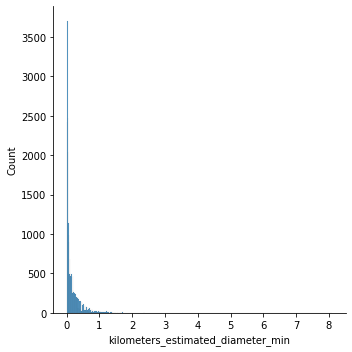

In [90]:
sns.displot(x=df['kilometers_estimated_diameter_min'])
plt.show()

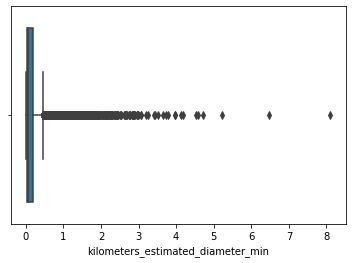

In [91]:
sns.boxplot(x=df['kilometers_estimated_diameter_min'])
plt.show()

### **Maximum diameter size in kilometers**
*   **Distribution**: Lognormal
*   **Skew**: Positive distribution
*   **Mean**: 0.37
*   **Standart deviation**: 0.65

In [92]:
df['kilometers_estimated_diameter_max'].describe()

count    23992.000000
mean         0.375160
std          0.655169
min          0.001362
25%          0.054205
50%          0.136157
75%          0.440595
max         18.115068
Name: kilometers_estimated_diameter_max, dtype: float64

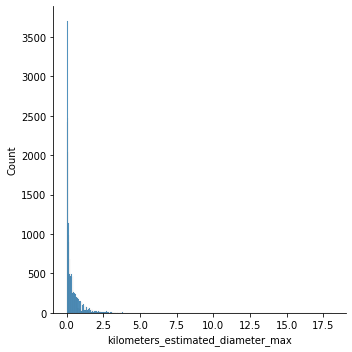

In [93]:
sns.displot(x=df['kilometers_estimated_diameter_max'])
plt.show()

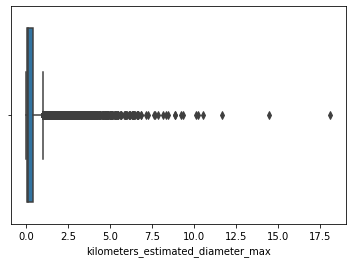

In [94]:
sns.boxplot(x=df['kilometers_estimated_diameter_max'])
plt.show()

## **NEOS orbit distance analysis**
It is expected that the aphelion of the NEOS has a few outliers due to the elliptical orbit of the objects, which are too far from the Sun, but the vast majority have low values because they are concentrated close to the Earth's orbit. Perihelion has medium values since the distribution of small objects such as an asteroid orbiting so close to the Sun is low.

### **Aphelion distance in AU**
*   **Distribution**: Poisson
*   **Skew**: Positive Skew
*   **Mean**: 2.65
*   **Standart deviation**: 4.46

In [95]:
df['aphelion_distance'].describe()

count    24000.000000
mean         2.653104
std          4.468233
min          0.653754
25%          1.706281
50%          2.480109
75%          3.397965
max        631.895456
Name: aphelion_distance, dtype: float64

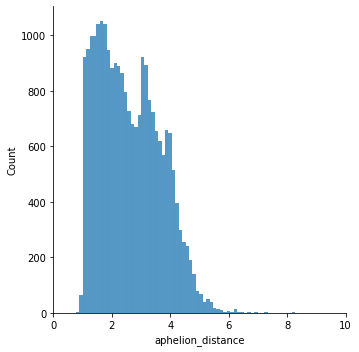

In [96]:
sns.displot(x=df['aphelion_distance'])
plt.xlim(0, 10)
plt.show()

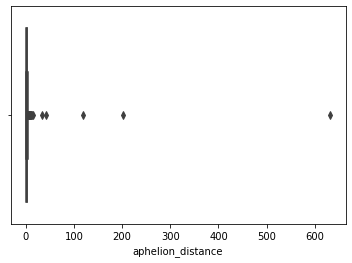

In [97]:
sns.boxplot(x=df['aphelion_distance'])
plt.show()

### **Perihelion distance in AU**
*   **Distribution**: Poisson
*   **Skew**: Negative Skew
*   **Mean**: 0.91
*   **Standart deviation**: 0.23

In [98]:
df['perihelion_distance'].describe()

count    24000.000000
mean         0.915225
std          0.232201
min          0.070431
25%          0.785150
50%          0.965325
75%          1.068984
max          1.299988
Name: perihelion_distance, dtype: float64

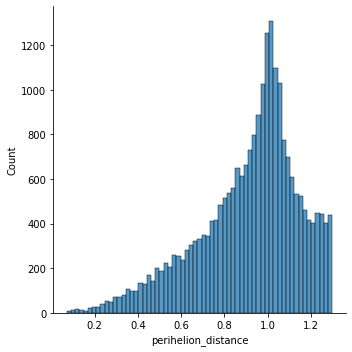

In [99]:
sns.displot(x=df['perihelion_distance'])
plt.show()

# **Multivariate data analysis**

## **NEOS size and magnitude analysis**
The correlation between size and brightness of an object is expected, as the larger the surface, the greater the reflection of light.

<function matplotlib.pyplot.show(*args, **kw)>

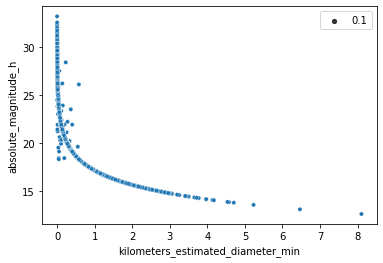

In [100]:
sns.scatterplot(x=df['kilometers_estimated_diameter_min'], y=df['absolute_magnitude_h'], size=0.1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

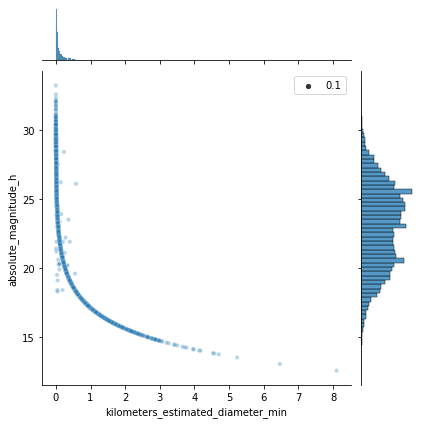

In [101]:
sns.jointplot(x=df['kilometers_estimated_diameter_min'], y=df['absolute_magnitude_h'], alpha=0.3, joint_kws={'size': 0.1})
plt.show

## **NEOS perihelion distance, magnitude and size analysis**
The correlation between size and brightness of an object is expected, but if the distance from the orbit to the Sun is very high, the light that will reach the object will be smaller.

<function matplotlib.pyplot.show(*args, **kw)>

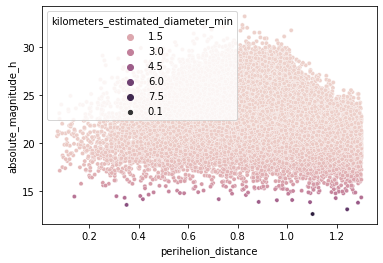

In [102]:
sns.scatterplot(x=df['perihelion_distance'], y=df['absolute_magnitude_h'], hue=df['kilometers_estimated_diameter_min'], size=0.1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

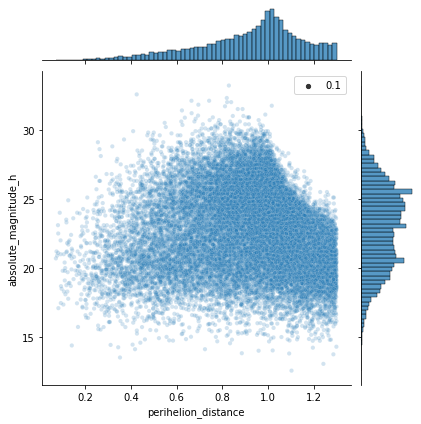

In [103]:
sns.jointplot(x=df['perihelion_distance'], y=df['absolute_magnitude_h'], alpha=0.2, joint_kws={'size': 0.1})
plt.show

## **NEOS size and first date observation analisys grouped by orbit class**
The first NEOS discovered until 1940, are of considerable size, because with the technology of the epoch it was only possible to observe large objects that have a greater brightness.

<function matplotlib.pyplot.show(*args, **kw)>

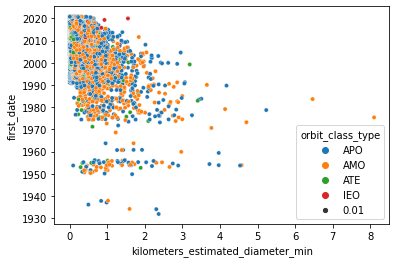

In [104]:
sns.scatterplot(x=df['kilometers_estimated_diameter_min'], y=df['first_date'], hue=df['orbit_class_type'], size=0.01)
plt.show

## **NEOS magnitude and first date observation analisys grouped by orbit class**
Complementing the previous analysis, it is possible to verify that the NEOS discovered before 1940 have a great brightness, measured by their magnitude.

<function matplotlib.pyplot.show(*args, **kw)>

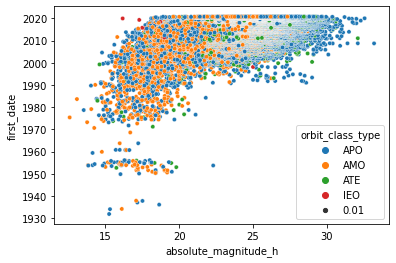

In [105]:
sns.scatterplot(x=df['absolute_magnitude_h'], y=df['first_date'], hue=df['orbit_class_type'], size=0.01)
plt.show

## **NEOS perihelion and orbit class groups analysis**
The grouping of NEOS is defined by their orbit distance from Earth in astronomical units. These groups are sharply separated when objects are compared according to their perihelion.

<function matplotlib.pyplot.show(*args, **kw)>

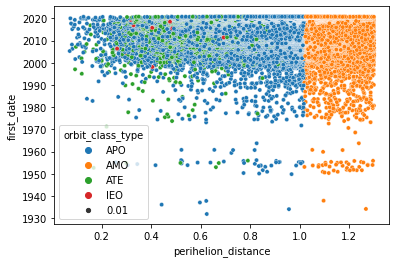

In [106]:
sns.scatterplot(x=df['perihelion_distance'], y=df['first_date'], hue=df['orbit_class_type'], size=0.01)
plt.show

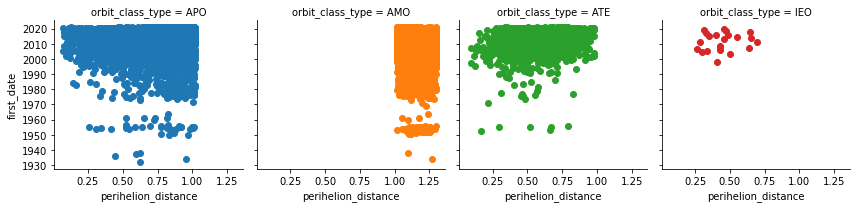

In [107]:
g = sns.FacetGrid(df, col='orbit_class_type', hue='orbit_class_type')
g = g.map(plt.scatter, 'perihelion_distance', 'first_date')
plt.show()

## **NEOS aphelion and orbit class groups analysis**
Only the AMO group NEOS allows objects to have a very eccentric orbit and distance, so it is the only group with objects with discrepant aphelion distances.

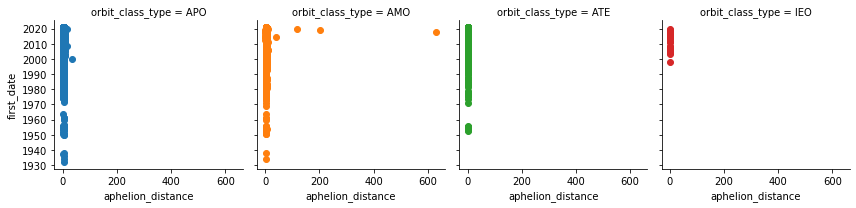

In [108]:
g = sns.FacetGrid(df, col='orbit_class_type', hue='orbit_class_type')
g = g.map(plt.scatter, 'aphelion_distance', 'first_date')
plt.show()

## **NEOS minimum and maximum estimated sizes analysis**
It is expected that there is a correlation between the estimated minimum and maximum size of an object. In that case the correlation is positive perfect.

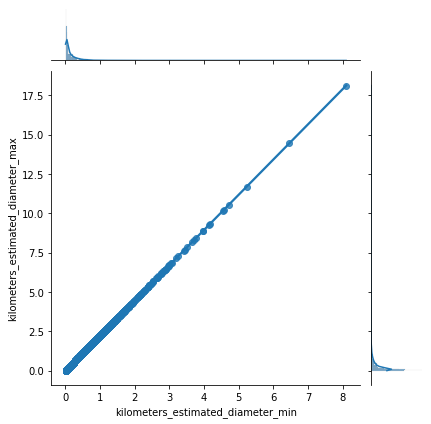

In [109]:
sns.jointplot(x=df['kilometers_estimated_diameter_min'], y=df['kilometers_estimated_diameter_max'], kind='reg')

# **Final Plots**

### **Comparation of potentially hazardous and Sentry monitored asteroids**

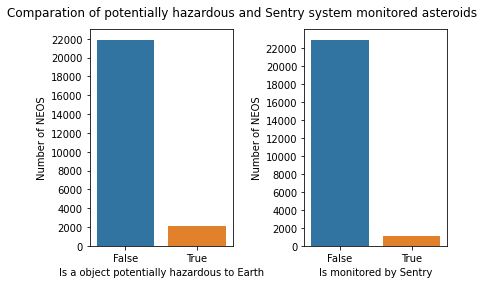

In [110]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot(x=df['is_potentially_hazardous_asteroid'], ax=ax1)
sns.countplot(x=df['is_sentry_object'], ax=ax2, y=None)
fig.tight_layout()
fig.subplots_adjust(top=.9)
fig.suptitle('Comparation of potentially hazardous and Sentry system monitored asteroids')
ax1.set_xlabel('Is a object potentially hazardous to Earth')
ax1.set_ylabel('Number of NEOS')
ax1.set_yticks(np.arange(0, 24000, 2000))
ax2.set_xlabel('Is monitored by Sentry')
ax2.set_ylabel('Number of NEOS')
ax2.set_yticks(np.arange(0, 24000, 2000))
plt.show()

## **NEOS bright and size correlation**

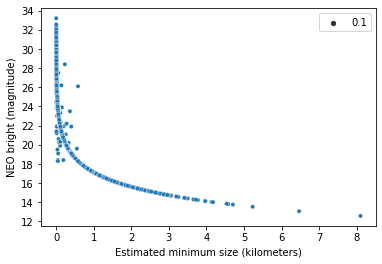

In [111]:
fig, ax = plt.subplots(1)
sns.scatterplot(x=df['kilometers_estimated_diameter_min'], y=df['absolute_magnitude_h'], size=0.1)
#fig.suptitle('Correlation between an object size and bright')
plt.xlabel('Estimated minimum size (kilometers)')
plt.ylabel('NEO bright (magnitude)')
ax.set_yticks(np.arange(12, 35, 2))
plt.show()

## **NEOS perihelion and discovery date correlation**

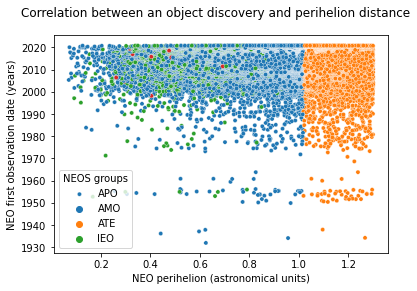

In [112]:
fig = plt.figure()
sns.scatterplot(x=df['perihelion_distance'], y=df['first_date'], hue=df['orbit_class_type'], size=0.001)
fig.suptitle('Correlation between an object discovery and perihelion distance')
plt.xlabel('NEO perihelion (astronomical units)')
plt.ylabel('NEO first observation date (years)')
plt.legend(labels=['APO', 'AMO', 'ATE', 'IEO'], title='NEOS groups')
plt.show()

## **NEOS bright (magnitude) distribution**

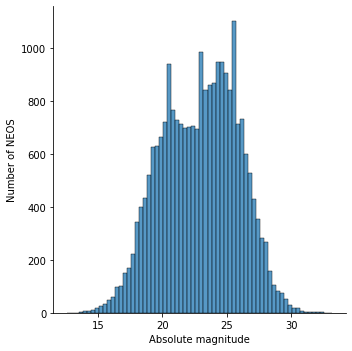

In [113]:
sns.displot(df['absolute_magnitude_h'])
plt.xlabel('Absolute magnitude')
plt.ylabel('Number of NEOS')
plt.show()

## **NEOS groups**

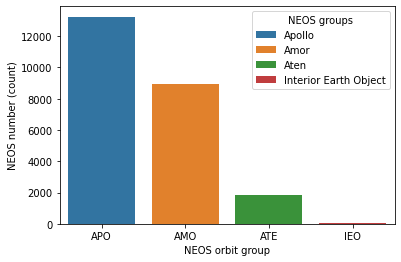

In [114]:
sns.countplot(data=df, x='orbit_class_type', hue='orbit_class_type', dodge=False,)
fig.suptitle('Correlation between an object discovery and perihelion distance')
plt.xlabel('NEOS orbit group')
plt.ylabel('NEOS number (count)')
plt.legend(labels=['Apollo', 'Amor', 'Aten', 'Interior Earth Object'], title='NEOS groups')
plt.show()

# **Machine Learning Classification**

In [115]:
# Train and test variables split
X, y = cleanDf.drop('orbit_class_type', axis=1), cleanDf['orbit_class_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## **Decision Tree**

In [116]:
# Decision Tree model training
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### **Decision Tree classification plot**

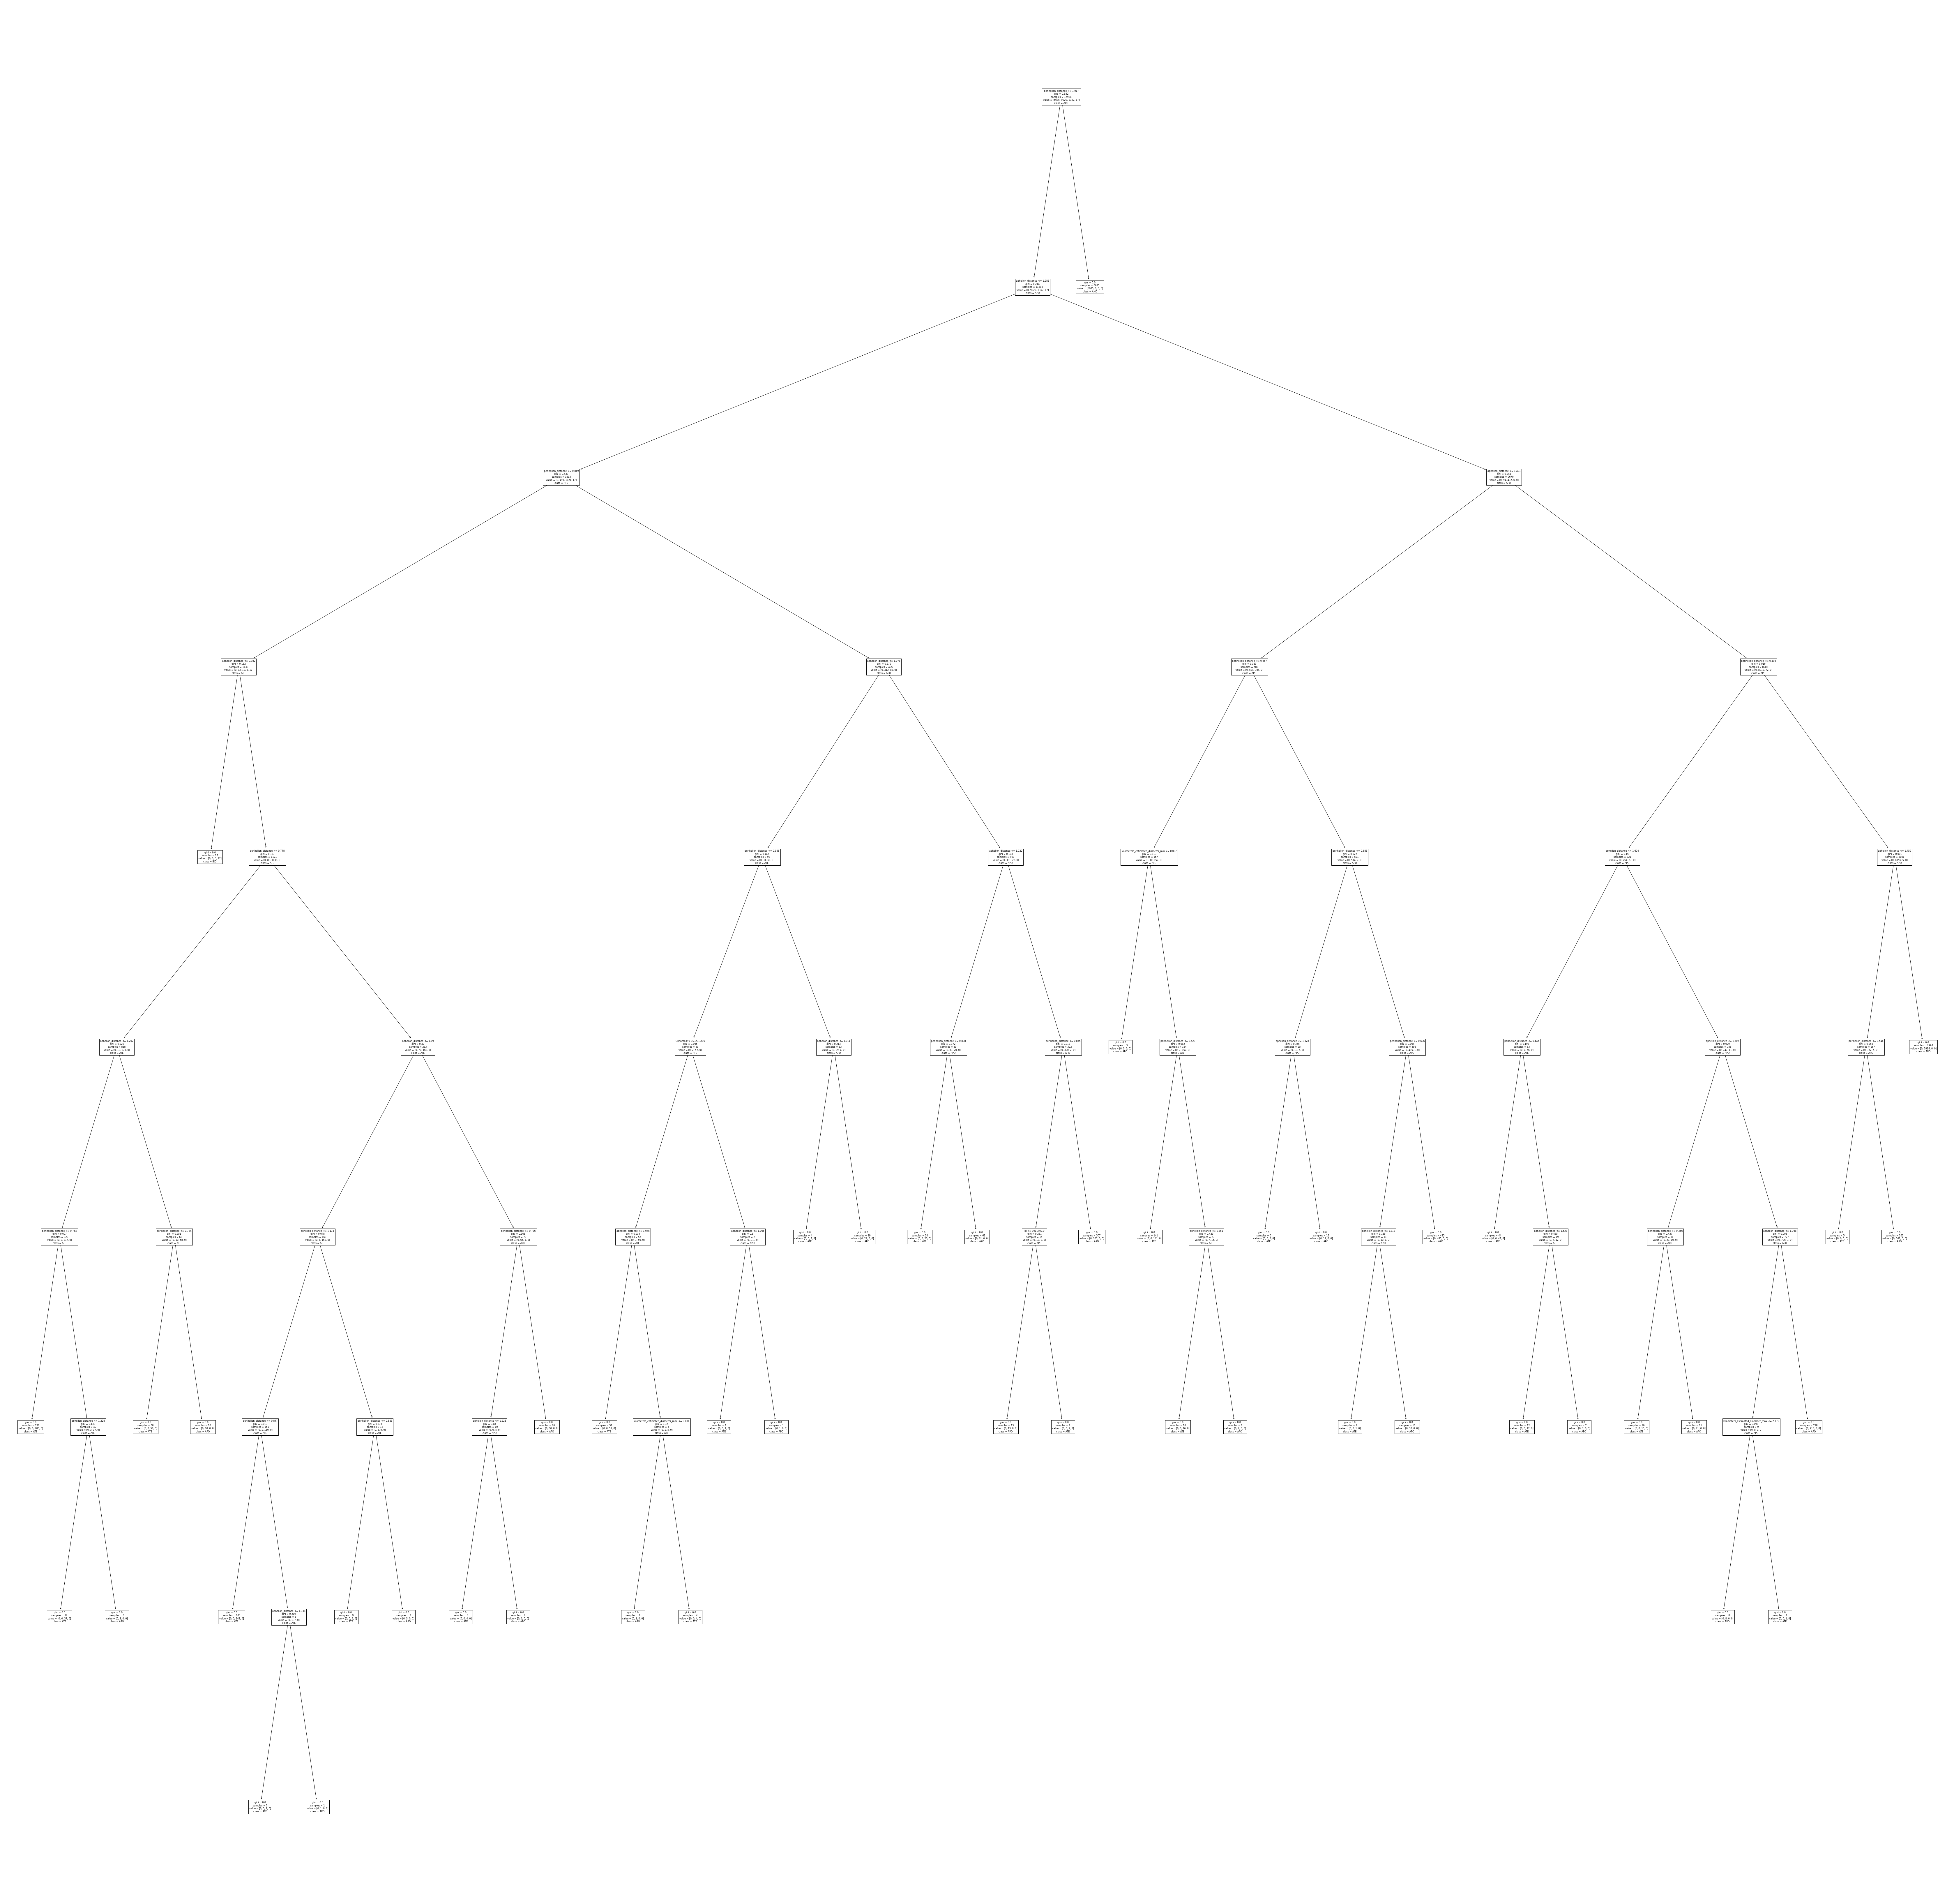

In [117]:
plt.figure(figsize=(120,120))
plot_tree(dt, \
          feature_names=X_train.columns.values, \
          class_names=dt.classes_)
plt.show()

### **Decision Tree confusion matrix and score**
The Decision Tree achieved excellent accuracy and performance in the classification of NEOS. Visualizing the leaves of the tree, it is possible to observe that the model correctly applied the weight to the distance of object orbit (perihelion and aphelion) in relation to planet Earth, which is the attribute used to classify a NEO in a group.

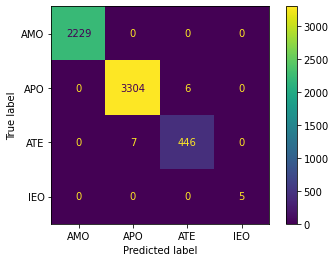

In [118]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dt.classes_).plot()
plt.show()

In [119]:
dt.score(X_test, y_test)

0.9978322494580624

## **KNeighborsClassifier (KNN)**

In [120]:
# KNN model training
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### **KNeighborsClassifier confusion matrix**
The KNN model had a well-balanced classification accuracy, with a high error rate. This can be explained due to the method used by the model to classify, with each object being compared to the nearest neighbor. In this case, this metric is not good, since the definition of which group the NEO belongs to is determined by the proximity of the distance of the object's orbit in relation to planet Earth.

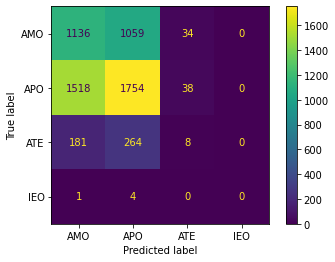

In [121]:
y_pred = knn_4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dt.classes_).plot()
plt.show()

In [122]:
knn_4.score(X_test, y_test)

0.4832416208104052

## **MLP Neural Network**

In [123]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50, 10))

In [124]:
# MLP Neural Network model training
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50, 10))

### **MLP Neural Network confusion matrix**
The neural network correctly classified all NEOS used in training. This is due to the fact that the first perceptron layer is fed with the raw data input of the object already classified, so the next layers can be based on the weights used to classify each group, in this case being the aphelion and perihelion of each NEO.

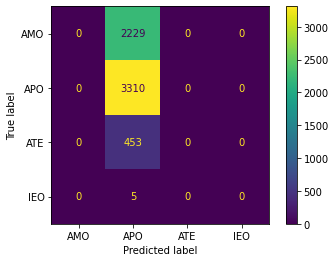

In [125]:
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=mlp.classes_).plot()
plt.show()

In [126]:
mlp.score(X_test, y_test)

0.5519426379856595

# Digest

Neste projeto, trabalhamos com uma base de dados sobre asteroides e tivemos sucesso em alguns pontos objetivos da equipe, que era essencialmente comparar dados antigos e atuais, tamanho, brilho e distância dos asteroides e cometas mapeados, a fim de encontrar padrões e potenciais riscos de colisão com o nosso planeta. Com essa base, foi possível fazer relações de brilho e distância dos asteroides, obtendo o resultado que quanto maior é o seu brilho mais facilmente mapeado ele será. Essa relação também se dá conforme o tamanho destes objetos, sendo os menores identificados apenas quando estão a uma distância menor da Terra, exceto quando seu brilho é muito alto. Na parte dos gráficos de análise univariada, conseguimos utilizar boxplot, histogramas, gráfico de barras para organizar nossos dados e facilitar o entendimento dos nossos objetivos citados a cima.
<br>
Para a classificação utilizando aprendizado de máquina, aplicamos diversos modelos, como o Gaussian Naive Bayes, Decision Tree, k-Nearest Neighbors, Logistic Regression e MLP Neural Network. Desta forma pudemos analisar o desempenho das classificações geradas na nossa base de dados. A partir disso decidimos aplicar apenas 3 deles, que serão explicados abaixo:

*   **Decision Tree:** Além do bom desempenho que este modelo teve no dataset, a legibilidade dos atributos analisados foi um diferencial para quê este modelo fosse aplicado em nosso projeto. No plot da árvore de decisão podemos ver claramente que a distância da órbita de um NEO é o fator determinante para sua classificação.
*   **KNeighborsClassifier**: Este modelo não obteve um bom desempenho na classificação dos objetos do nosso dataset, porém resolvemos deixá-lo para demonstrar que este modelo não funciona para classificar corretamente com base em atributos imutáveis para determinar grupos. Nesse caso a proximidade entre um atributo ou outro é irrelevante para classificar um NEO.
*   **MLP Neural Network**: A rede neural atingiu de forma muito satisfatória o objetivo de classificar os NEOS. Apesar de não ser possível observar os pesos utilizados para classificar, é esperado que a rede neural determine com facilidade que as distâncias de perihelion e aphelion são os valores que dividem os objetos em seus determinados grupos.

Na classificação foi possível determinar que a aplicação de alguns modelos é inviável para a classificar grupos que são determinados estritamente por um atributo, como é o caso dos NEOS que são agrupados de acordo com sua órbita. Quando o modelo k-Nearest Neighbors foi aplicado, a classificação foi ruim, pois mesmo objetos com características parecidas podem pertencer a outro grupo dependendo do seu aphelion e perihelion.
<br>
Acreditamos que poderíamos explorar outras correlações e classificações como, por exemplo, as datas de observação. Além disso, a base de dados poderia ter sido melhor tratada desde o início, determinando e retirando quais são os valores faltantes e incompatíveis.







